In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
data = pd.read_csv('/content/sample_data/Apparel_Sales_Transactions_Dataset_Weekly.csv')

In [3]:
data.head()

,Product_Name,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,BreezeFit T- Shirts,42,48,38,43,35,39,36,38,49,...,46,41,34,39,44,46,46,41,57,73
1,Linen Shirts,47,42,24,55,42,23,41,51,45,...,29,25,38,46,46,34,34,45,41,26
2,CoolWave BoardShorts,35,34,40,36,45,37,43,47,34,...,52,36,43,31,37,38,42,28,28,26
3,Maxi Dresses,38,32,36,37,42,33,56,37,39,...,38,30,36,37,34,39,44,31,25,16
4,Tank Top,28,43,40,43,54,33,39,30,38,...,43,39,34,33,41,43,35,30,29,27


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_Name  10 non-null     object
 1   W0            10 non-null     int64 
 2   W1            10 non-null     int64 
 3   W2            10 non-null     int64 
 4   W3            10 non-null     int64 
 5   W4            10 non-null     int64 
 6   W5            10 non-null     int64 
 7   W6            10 non-null     int64 
 8   W7            10 non-null     int64 
 9   W8            10 non-null     int64 
 10  W9            10 non-null     int64 
 11  W10           10 non-null     int64 
 12  W11           10 non-null     int64 
 13  W12           10 non-null     int64 
 14  W13           10 non-null     int64 
 15  W14           10 non-null     int64 
 16  W15           10 non-null     int64 
 17  W16           10 non-null     int64 
 18  W17           10 non-null     int64 
 19  W18        

In [5]:
# ACF plot
def graph(product_name):
    sales_data = data[data['Product_Name'] == product_name].iloc[:, 1:].values.flatten()
    plt.figure(figsize=(10, 6))
    plot_acf(sales_data, lags=20)
    plt.title(f"Autocorrelation Function {product_name} (ACF)")
    plt.show()

# PACF plot
    plt.figure(figsize=(10, 6))
    plot_pacf(sales_data, lags=20, method='ywm')
    plt.title(f"Partial Autocorrelation Function {product_name} (PACF)")
    plt.show()


<Figure size 1000x600 with 0 Axes>

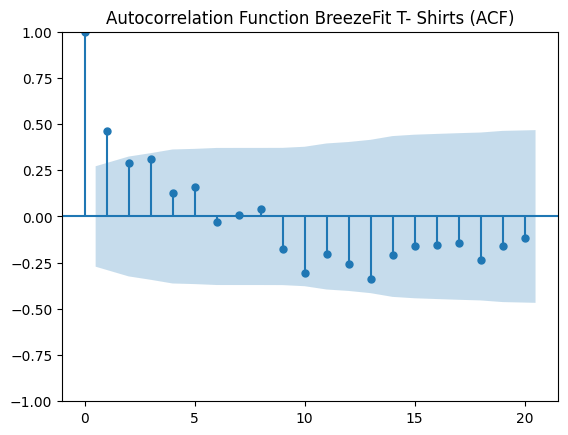

<Figure size 1000x600 with 0 Axes>

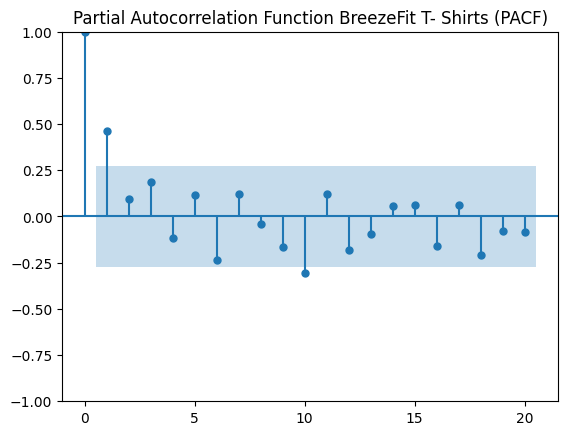

<Figure size 1000x600 with 0 Axes>

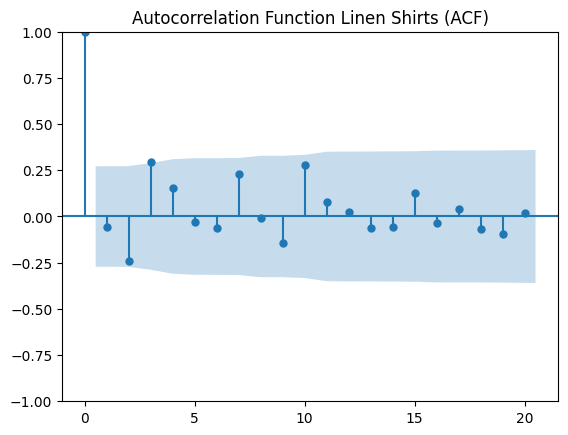

<Figure size 1000x600 with 0 Axes>

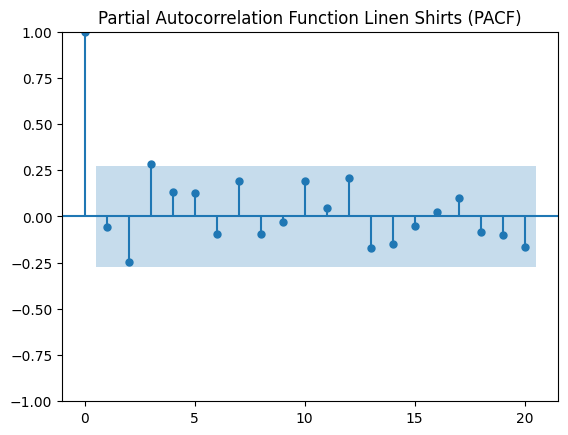

<Figure size 1000x600 with 0 Axes>

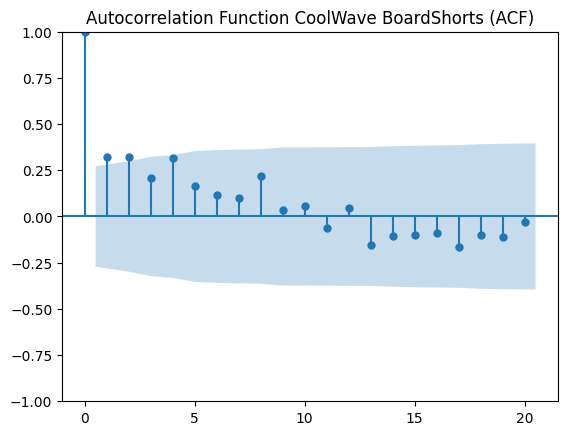

<Figure size 1000x600 with 0 Axes>

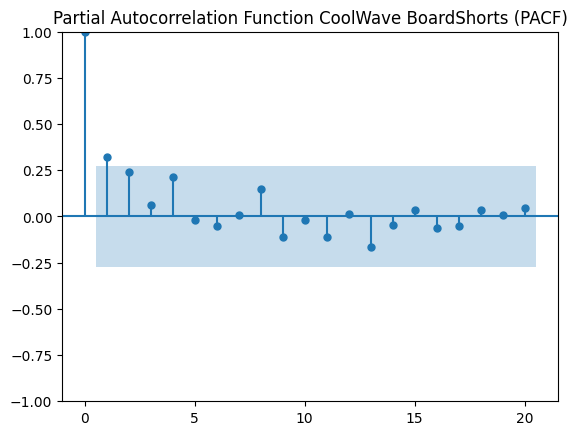

<Figure size 1000x600 with 0 Axes>

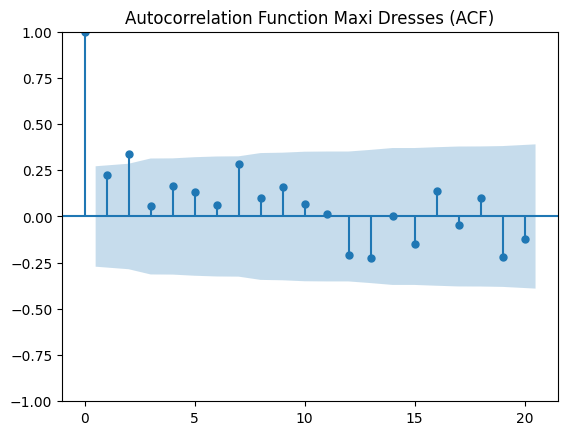

<Figure size 1000x600 with 0 Axes>

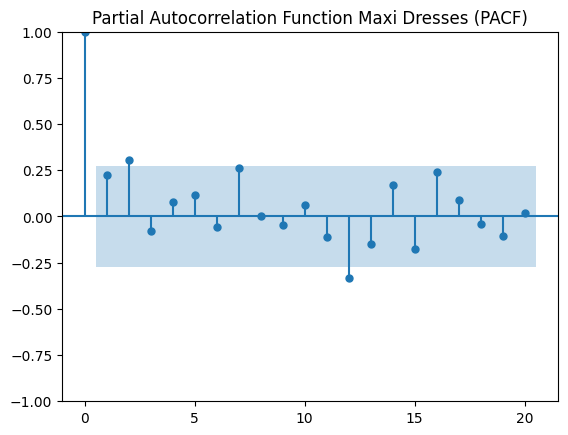

<Figure size 1000x600 with 0 Axes>

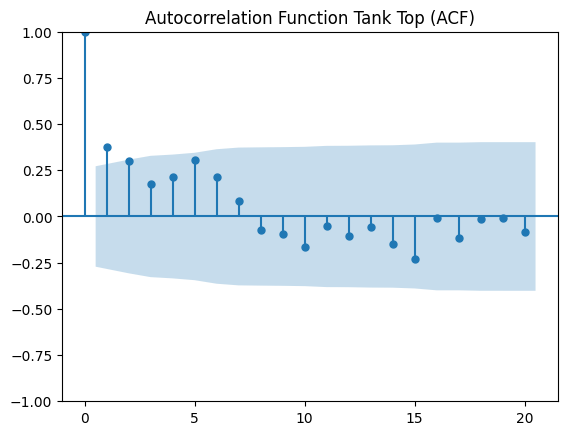

<Figure size 1000x600 with 0 Axes>

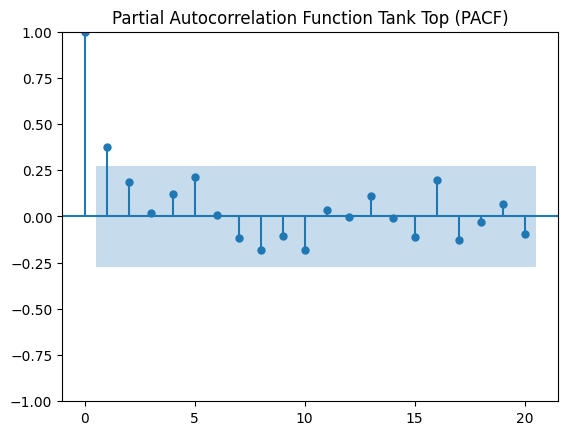

<Figure size 1000x600 with 0 Axes>

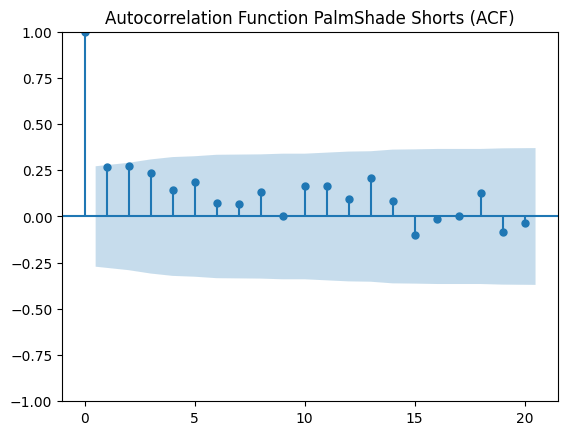

<Figure size 1000x600 with 0 Axes>

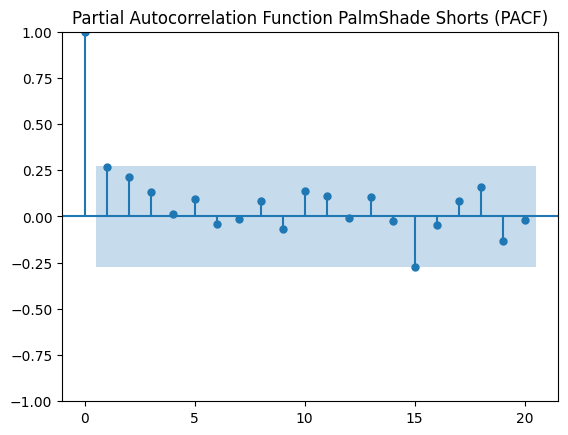

<Figure size 1000x600 with 0 Axes>

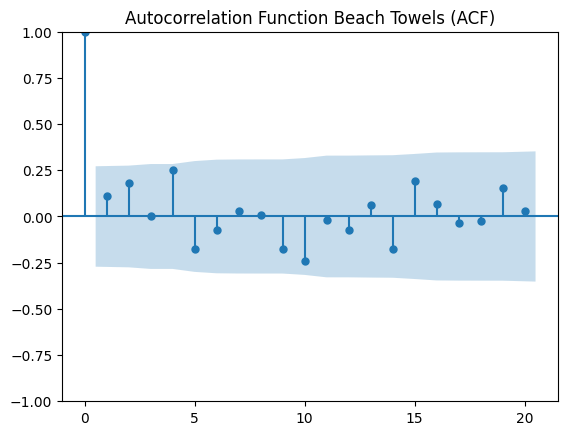

<Figure size 1000x600 with 0 Axes>

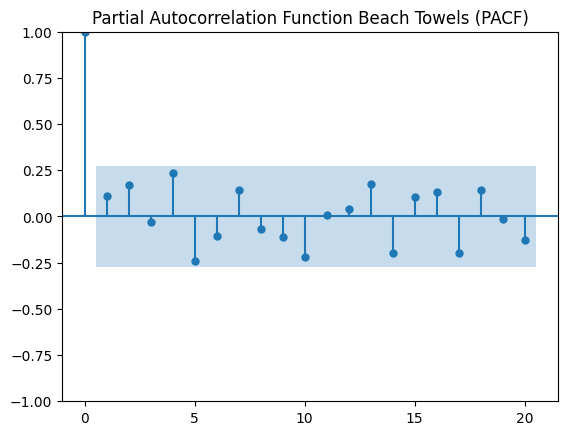

<Figure size 1000x600 with 0 Axes>

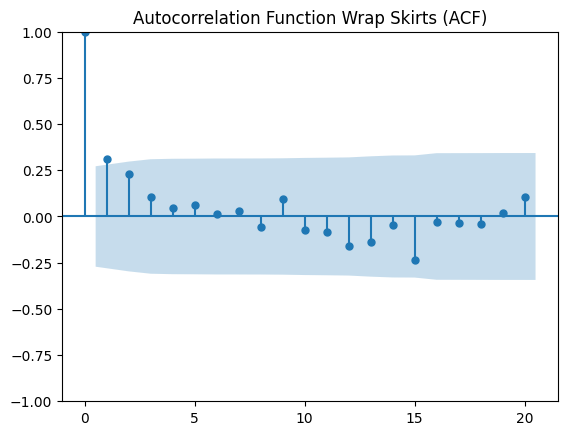

<Figure size 1000x600 with 0 Axes>

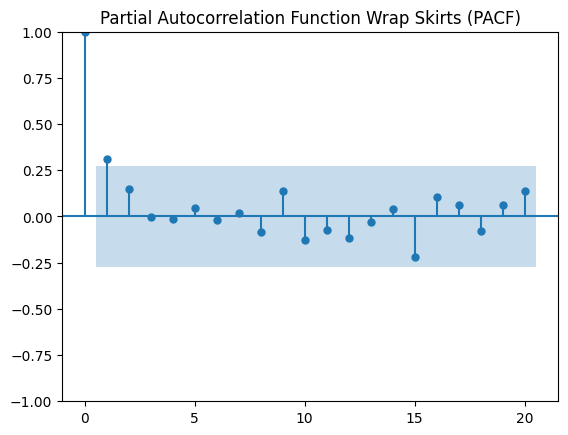

<Figure size 1000x600 with 0 Axes>

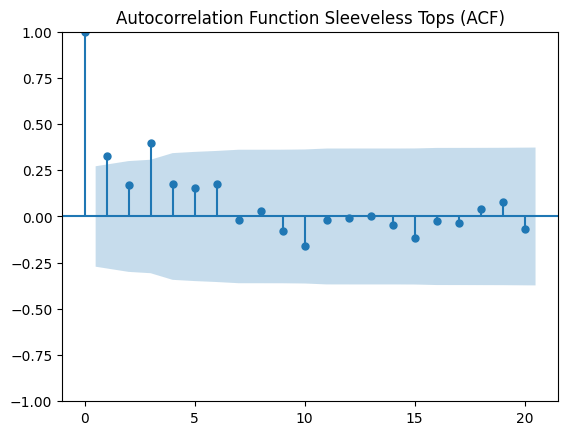

<Figure size 1000x600 with 0 Axes>

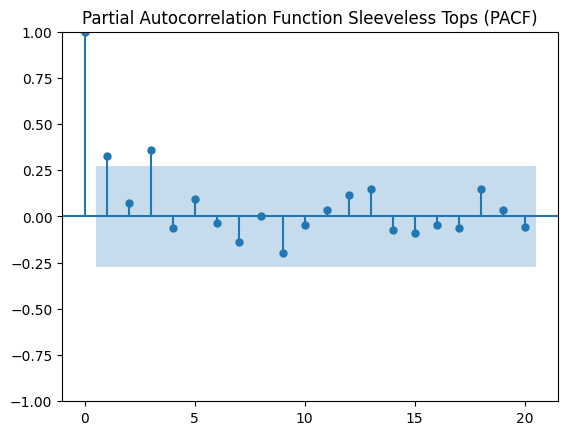

<Figure size 1000x600 with 0 Axes>

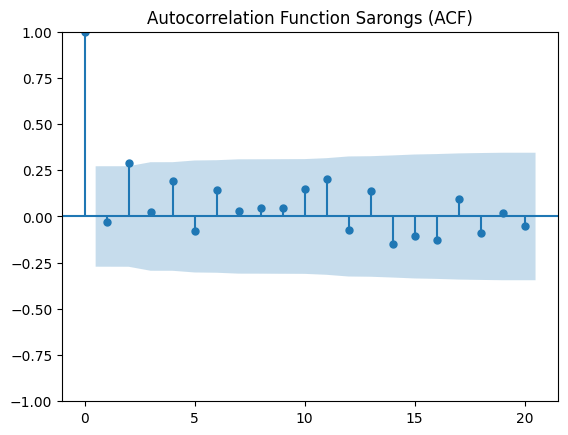

<Figure size 1000x600 with 0 Axes>

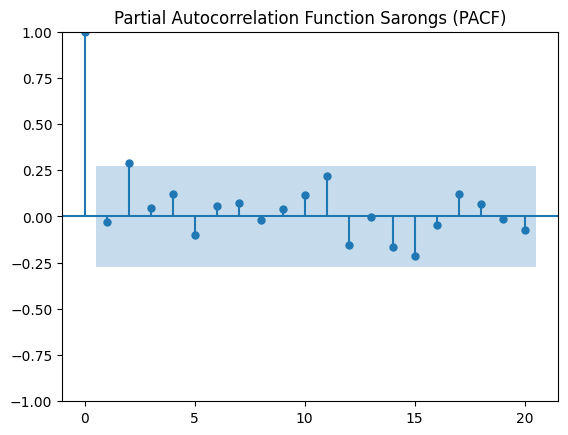

In [6]:
for i in range(0, 10):
  product_index = data.Product_Name[i]
  result = graph(product_index)

In [7]:
def evaluate_and_forecast(product_name, steps=10, seasonal_order=(1, 1, 1, 52)):
    sales_data = data[data['Product_Name'] == product_name].iloc[:, 1:].values.flatten()

    train_size = int(len(sales_data) * 0.8)
    train_data, test_data = sales_data[:train_size], sales_data[train_size:]

    ##p = range(1, 4)
    ##d = range(1, 2)
    ##q = range(1, 4)

    model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)  # Adjust p, d, q as needed
    model_fit = model.fit()

    test_forecast = model_fit.forecast(steps=len(test_data))

    mae = mean_absolute_error(test_data, test_forecast)
    mse = mean_squared_error(test_data, test_forecast)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((test_data - test_forecast) / test_data)) * 100

    print(f"\n\tEvaluation Metrics for {product_name}:")
    print(f"\t\tMean Absolute Error (MAE): {mae:.2f}")
    print(f"\t\tMean Squared Error (MSE): {mse:.2f}")
    print(f"\t\tRoot Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"\t\tMean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"\t\tAIC: {model_fit.aic}\n")

    plt.figure(figsize=(10, 6))
    plt.plot(range(len(train_data)), train_data, label='Training Data')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), test_data, label='Test Data', color='green')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), test_forecast, label='Predicted Data', color='red')
    plt.legend()
    plt.title(f'Actual vs Predicted Sales for {product_name}')
    plt.xlabel('Weeks')
    plt.ylabel('Sales')
    plt.grid(True)
    plt.show()


    full_forecast = model_fit.forecast(steps=steps)

    print('\n')
    residuals = model_fit.resid
    plt.figure(figsize=(10, 6))
    plt.plot(residuals, label='Residuals')
    plt.axhline(0, linestyle='--', color='red')
    plt.title('Residuals of the Model')
    plt.legend()
    plt.show()

    print('\n')
    plot_acf(residuals, lags=20)
    plt.title('Autocorrelation of Residuals')
    plt.show()


    return {
        "forecasted_values": np.round(full_forecast).astype(int),
        "mae": mae,
        "mse": mse,
        "rmse": rmse,
        "mape": mape
    }



Forecasting for BreezeFit T- Shirts


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



	Evaluation Metrics for BreezeFit T- Shirts:
		Mean Absolute Error (MAE): 8.00
		Mean Squared Error (MSE): 114.73
		Root Mean Squared Error (RMSE): 10.71
		Mean Absolute Percentage Error (MAPE): 17.52%
		AIC: 10.0



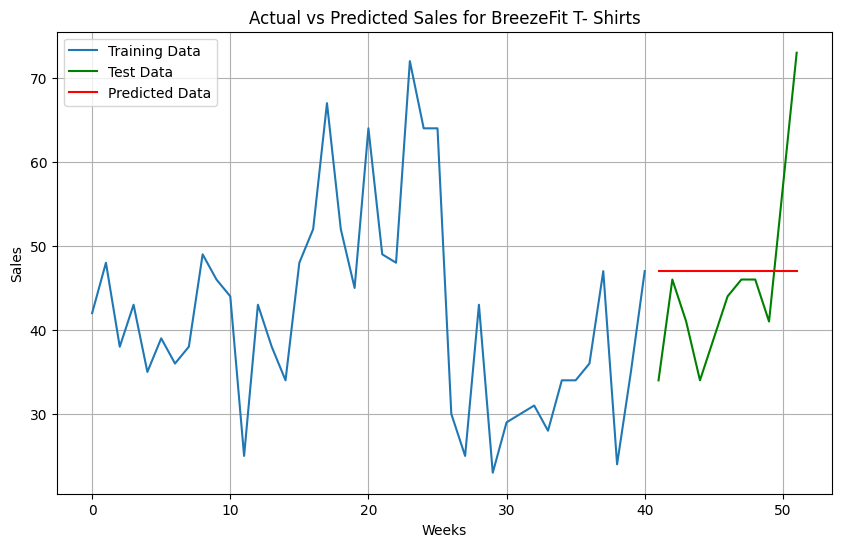

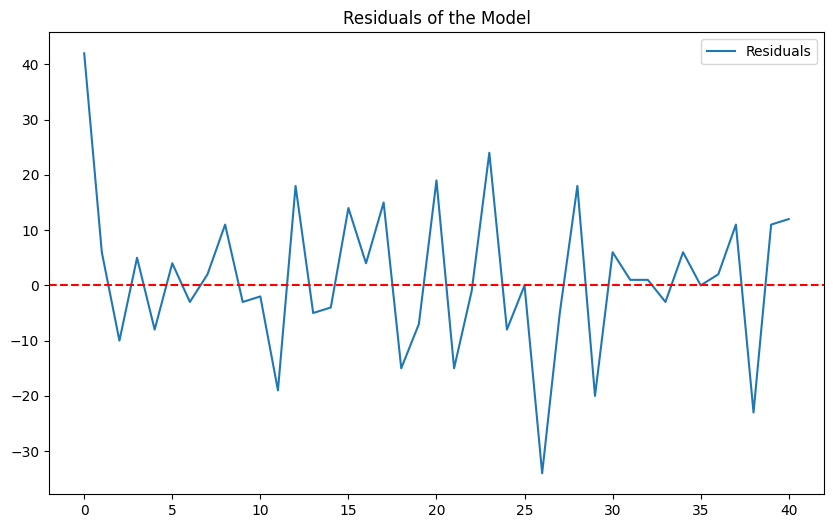

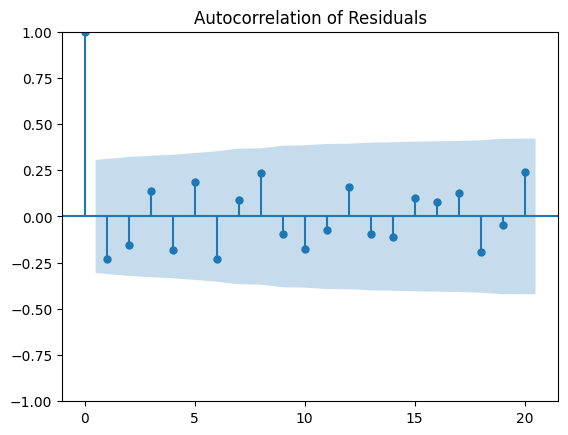


Forecasted Sales for BreezeFit T- Shirts (Next 10 Weeks)
  Week  Quantity
0   53        47
1   54        47
2   55        47
3   56        47
4   57        47
5   58        47
6   59        47
7   60        47
8   61        47
9   62        47


Forecasting for Linen Shirts


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



	Evaluation Metrics for Linen Shirts:
		Mean Absolute Error (MAE): 6.27
		Mean Squared Error (MSE): 55.18
		Root Mean Squared Error (RMSE): 7.43
		Mean Absolute Percentage Error (MAPE): 17.88%
		AIC: 10.0



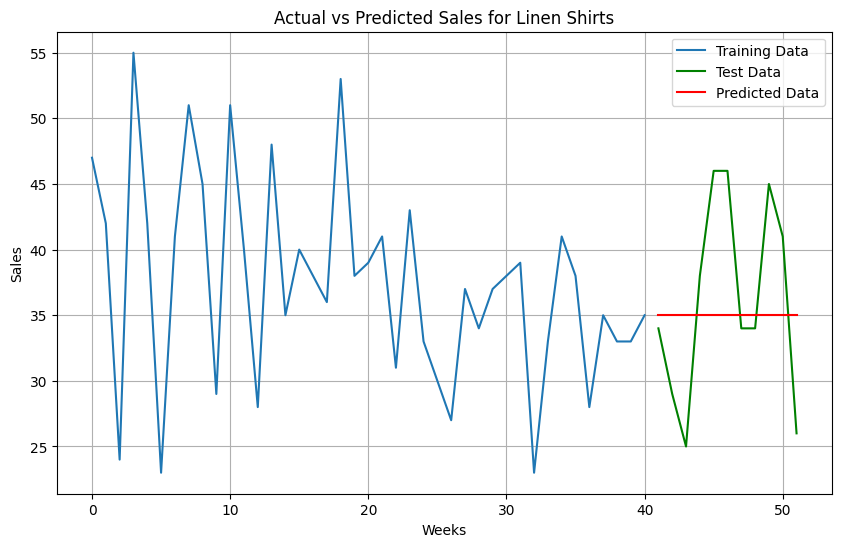

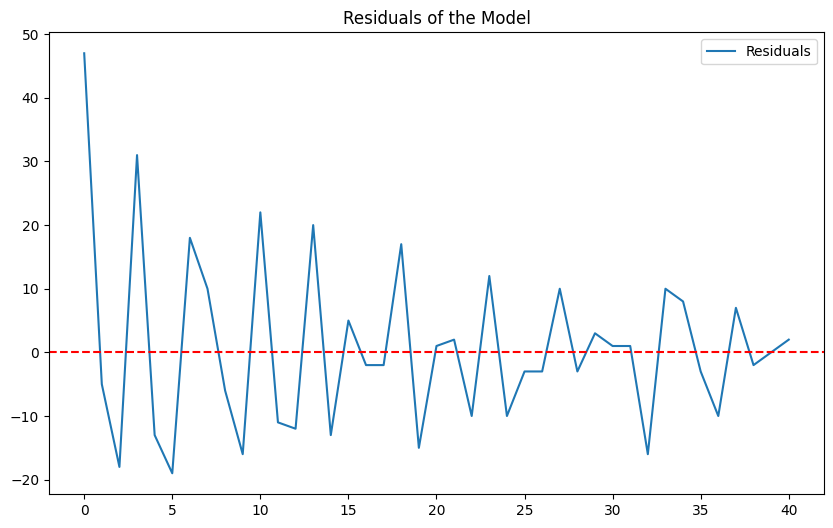

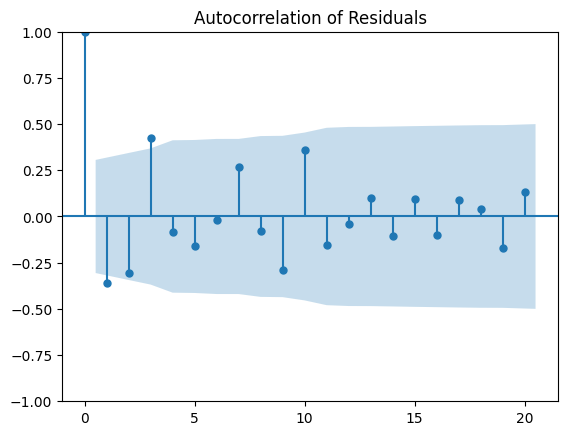


Forecasted Sales for Linen Shirts (Next 10 Weeks)
  Week  Quantity
0   53        35
1   54        35
2   55        35
3   56        35
4   57        35
5   58        35
6   59        35
7   60        35
8   61        35
9   62        35


Forecasting for CoolWave BoardShorts


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



	Evaluation Metrics for CoolWave BoardShorts:
		Mean Absolute Error (MAE): 10.27
		Mean Squared Error (MSE): 166.82
		Root Mean Squared Error (RMSE): 12.92
		Mean Absolute Percentage Error (MAPE): 25.77%
		AIC: 10.0



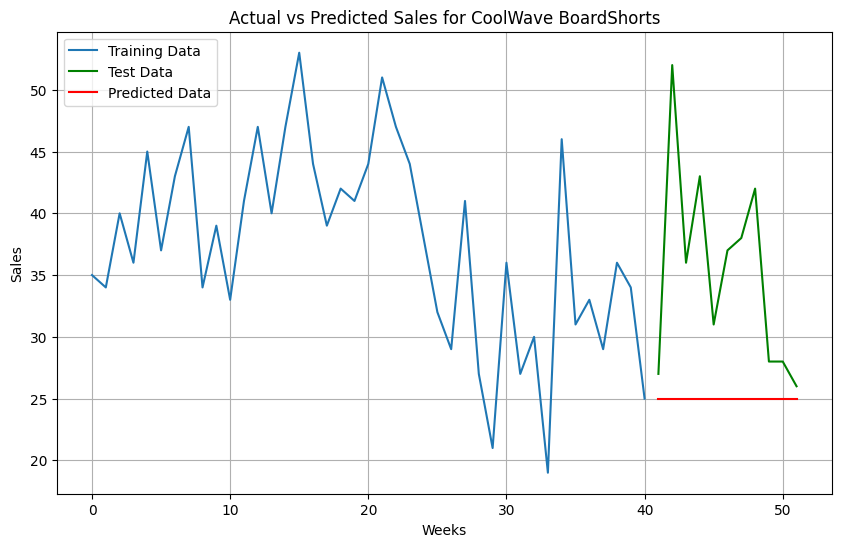

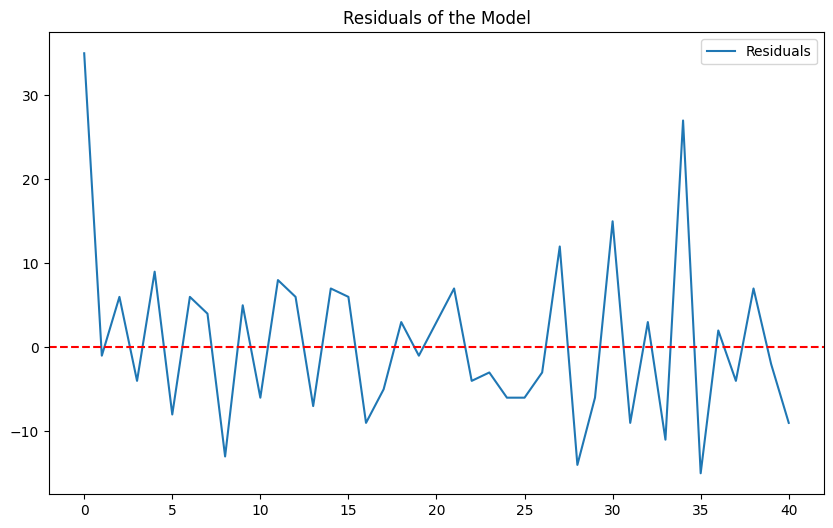

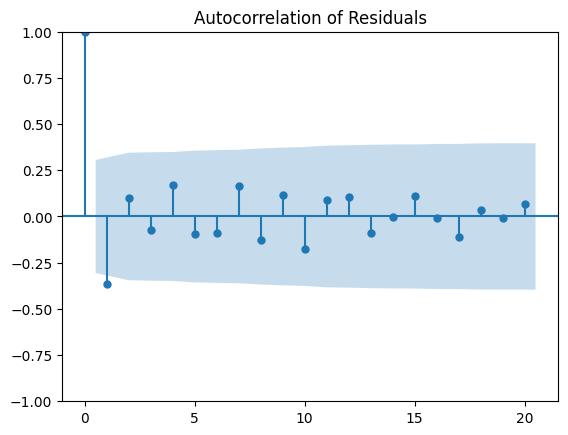


Forecasted Sales for CoolWave BoardShorts (Next 10 Weeks)
  Week  Quantity
0   53        25
1   54        25
2   55        25
3   56        25
4   57        25
5   58        25
6   59        25
7   60        25
8   61        25
9   62        25


Forecasting for Maxi Dresses


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



	Evaluation Metrics for Maxi Dresses:
		Mean Absolute Error (MAE): 8.18
		Mean Squared Error (MSE): 109.82
		Root Mean Squared Error (RMSE): 10.48
		Mean Absolute Percentage Error (MAPE): 33.55%
		AIC: 10.0



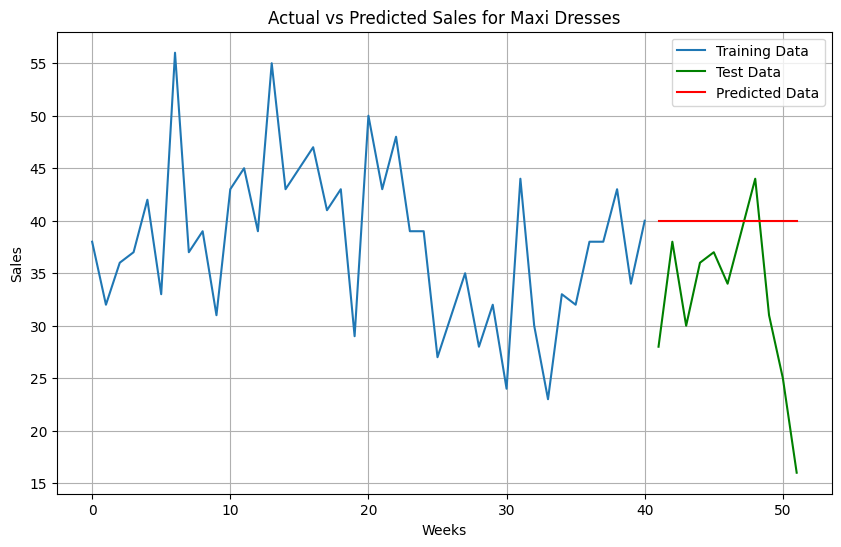

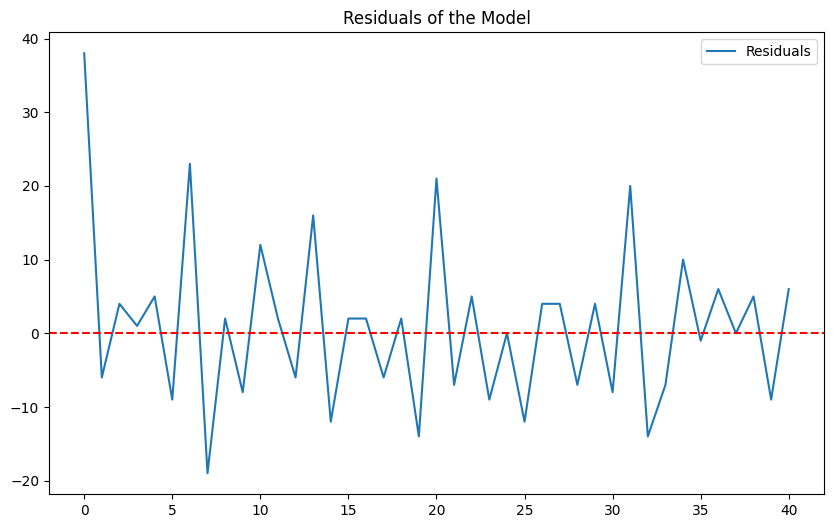

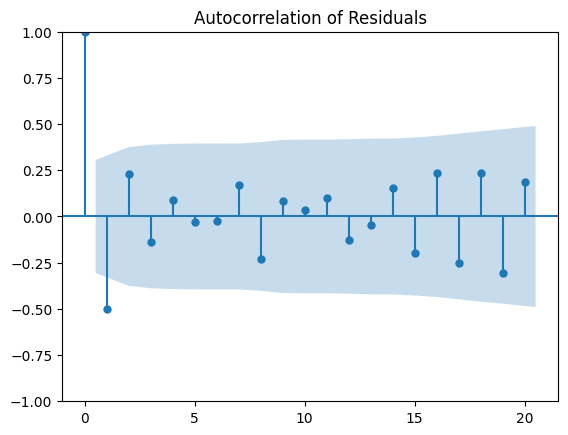


Forecasted Sales for Maxi Dresses (Next 10 Weeks)
  Week  Quantity
0   53        40
1   54        40
2   55        40
3   56        40
4   57        40
5   58        40
6   59        40
7   60        40
8   61        40
9   62        40


Forecasting for Tank Top


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



	Evaluation Metrics for Tank Top:
		Mean Absolute Error (MAE): 6.09
		Mean Squared Error (MSE): 57.36
		Root Mean Squared Error (RMSE): 7.57
		Mean Absolute Percentage Error (MAPE): 19.37%
		AIC: 10.0



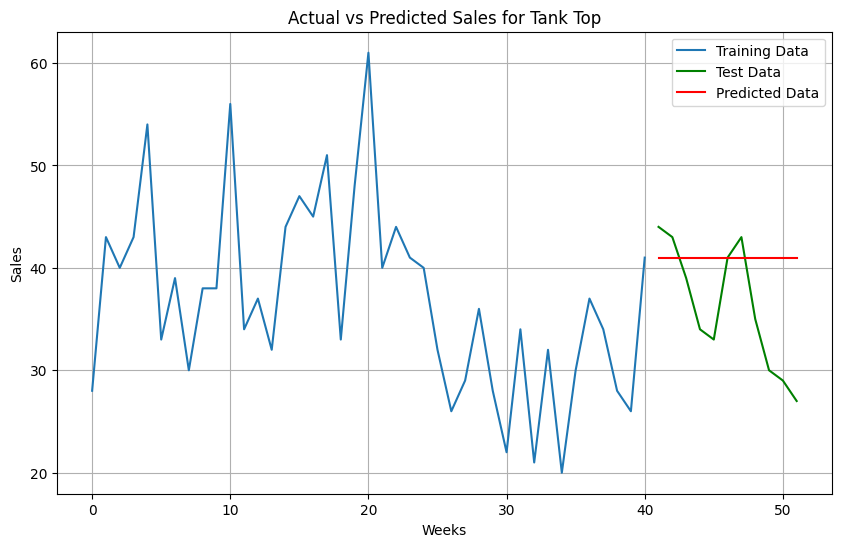

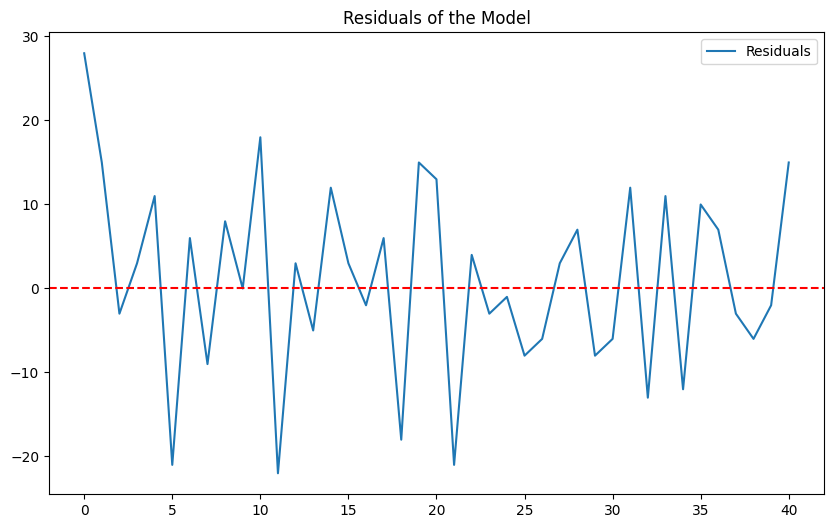

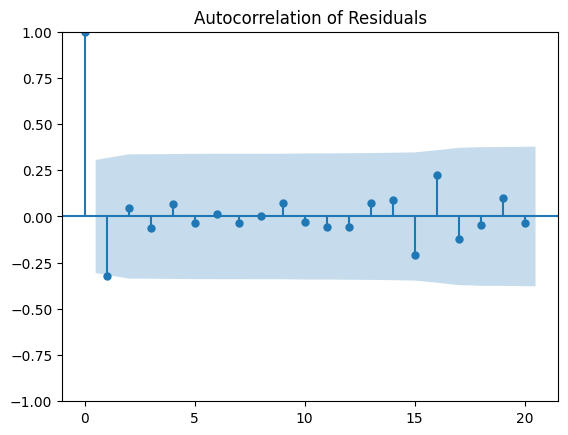


Forecasted Sales for Tank Top (Next 10 Weeks)
  Week  Quantity
0   53        41
1   54        41
2   55        41
3   56        41
4   57        41
5   58        41
6   59        41
7   60        41
8   61        41
9   62        41


Forecasting for PalmShade Shorts


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



	Evaluation Metrics for PalmShade Shorts:
		Mean Absolute Error (MAE): 5.18
		Mean Squared Error (MSE): 35.73
		Root Mean Squared Error (RMSE): 5.98
		Mean Absolute Percentage Error (MAPE): 15.36%
		AIC: 10.0



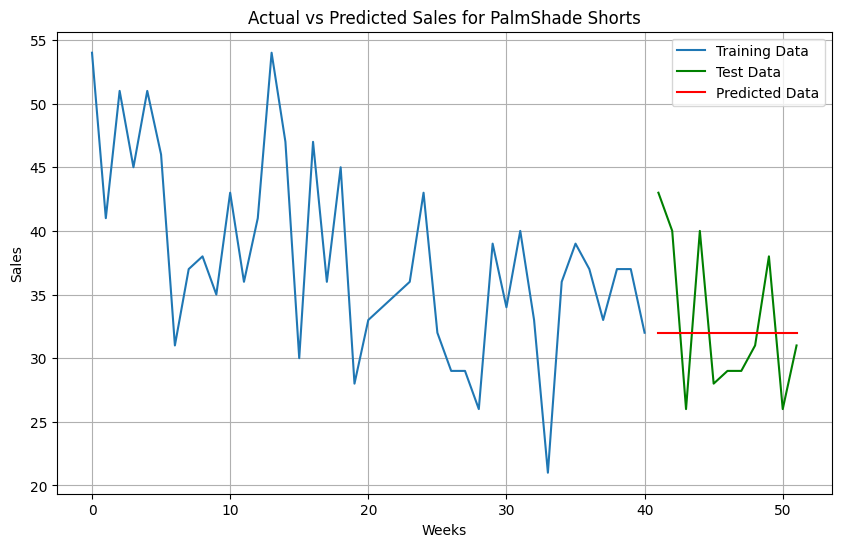

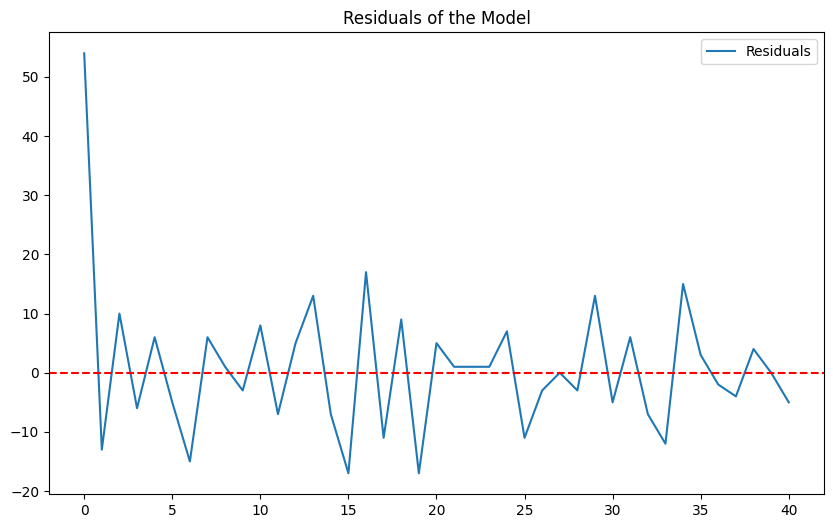

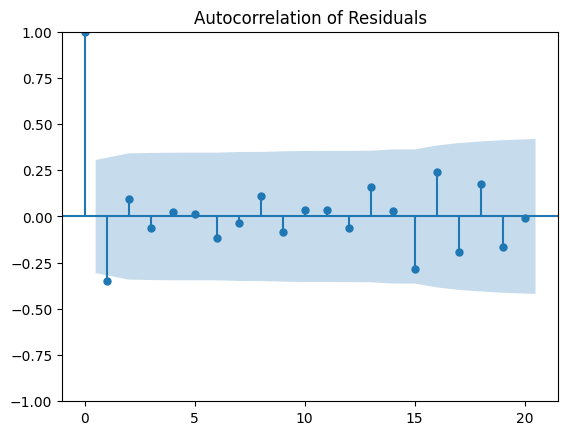


Forecasted Sales for PalmShade Shorts (Next 10 Weeks)
  Week  Quantity
0   53        32
1   54        32
2   55        32
3   56        32
4   57        32
5   58        32
6   59        32
7   60        32
8   61        32
9   62        32


Forecasting for Beach Towels


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



	Evaluation Metrics for Beach Towels:
		Mean Absolute Error (MAE): 6.09
		Mean Squared Error (MSE): 67.18
		Root Mean Squared Error (RMSE): 8.20
		Mean Absolute Percentage Error (MAPE): 18.52%
		AIC: 10.0



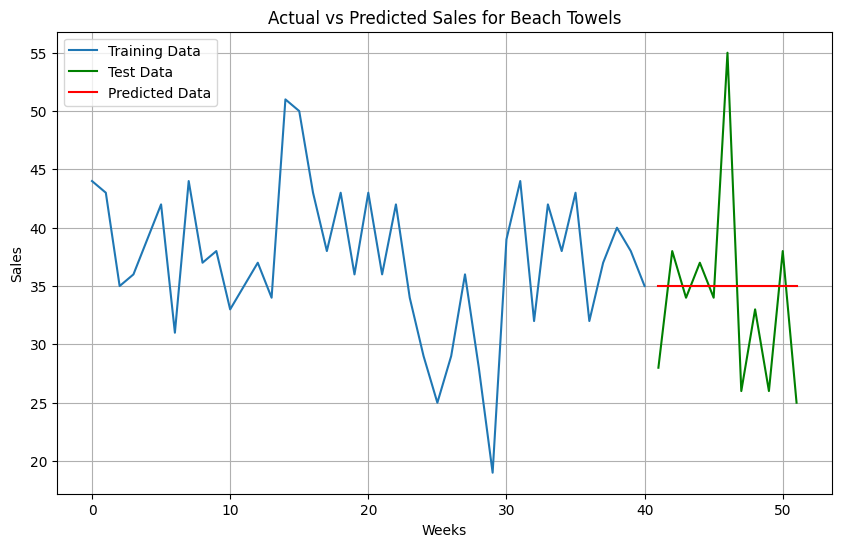

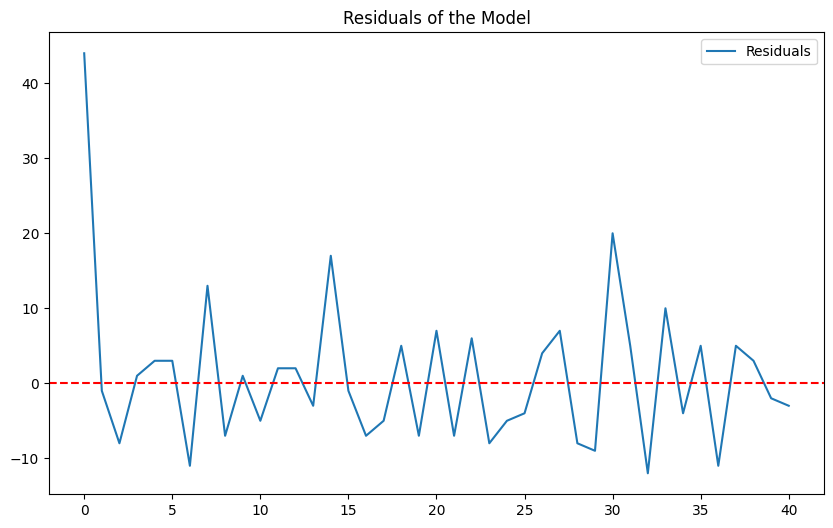

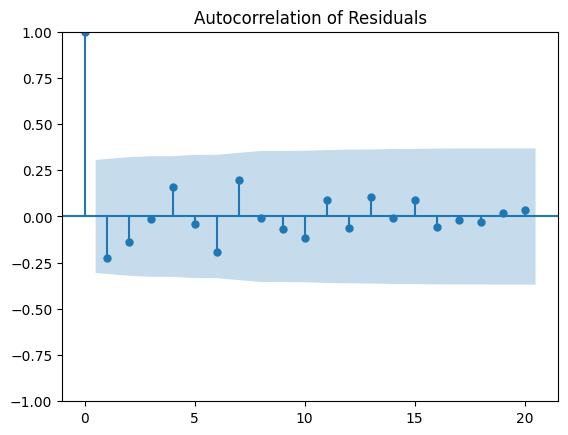


Forecasted Sales for Beach Towels (Next 10 Weeks)
  Week  Quantity
0   53        35
1   54        35
2   55        35
3   56        35
4   57        35
5   58        35
6   59        35
7   60        35
8   61        35
9   62        35


Forecasting for Wrap Skirts


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



	Evaluation Metrics for Wrap Skirts:
		Mean Absolute Error (MAE): 8.09
		Mean Squared Error (MSE): 105.91
		Root Mean Squared Error (RMSE): 10.29
		Mean Absolute Percentage Error (MAPE): 32.80%
		AIC: 10.0



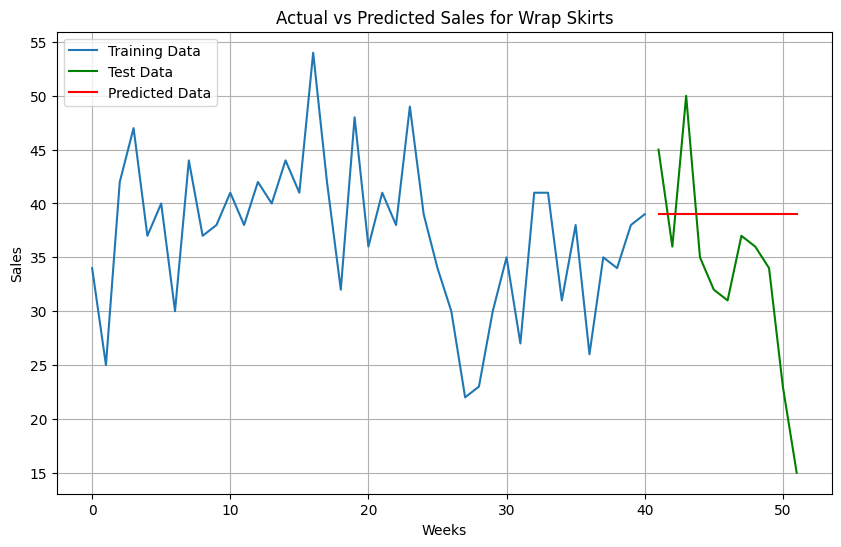

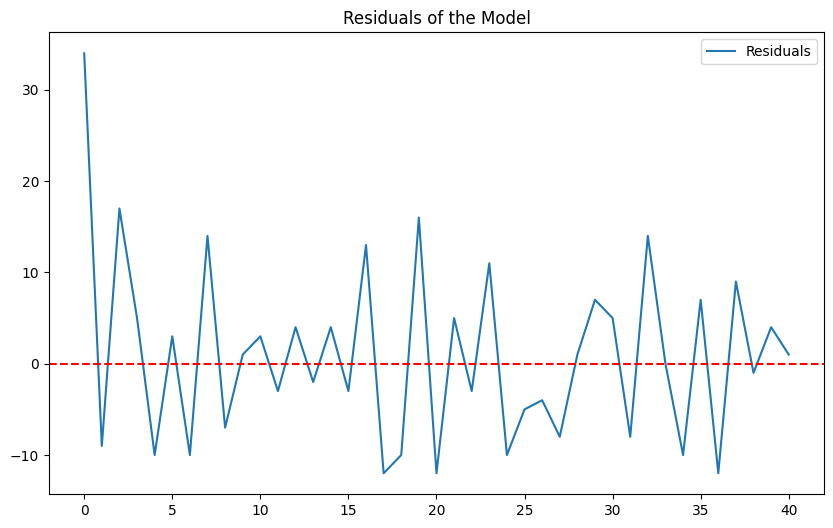

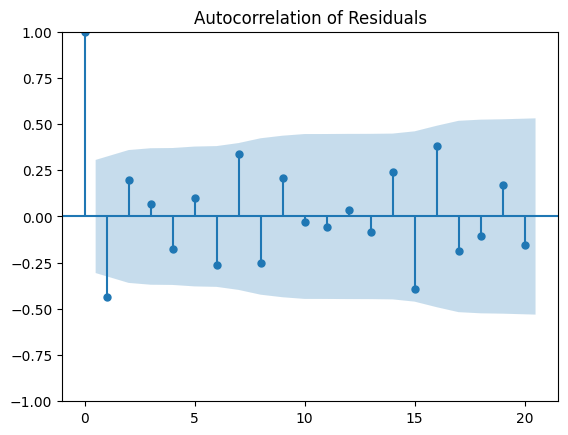


Forecasted Sales for Wrap Skirts (Next 10 Weeks)
  Week  Quantity
0   53        39
1   54        39
2   55        39
3   56        39
4   57        39
5   58        39
6   59        39
7   60        39
8   61        39
9   62        39


Forecasting for Sleeveless Tops


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



	Evaluation Metrics for Sleeveless Tops:
		Mean Absolute Error (MAE): 5.18
		Mean Squared Error (MSE): 43.36
		Root Mean Squared Error (RMSE): 6.59
		Mean Absolute Percentage Error (MAPE): 17.08%
		AIC: 10.0



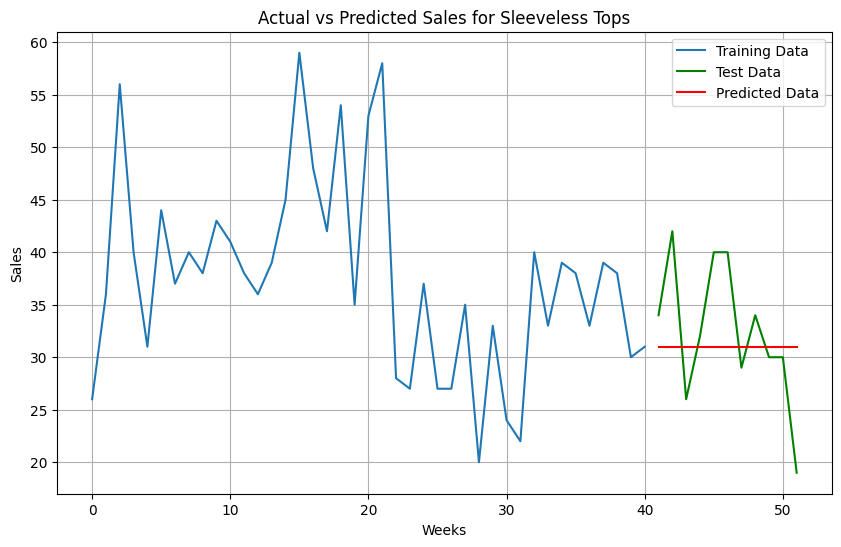

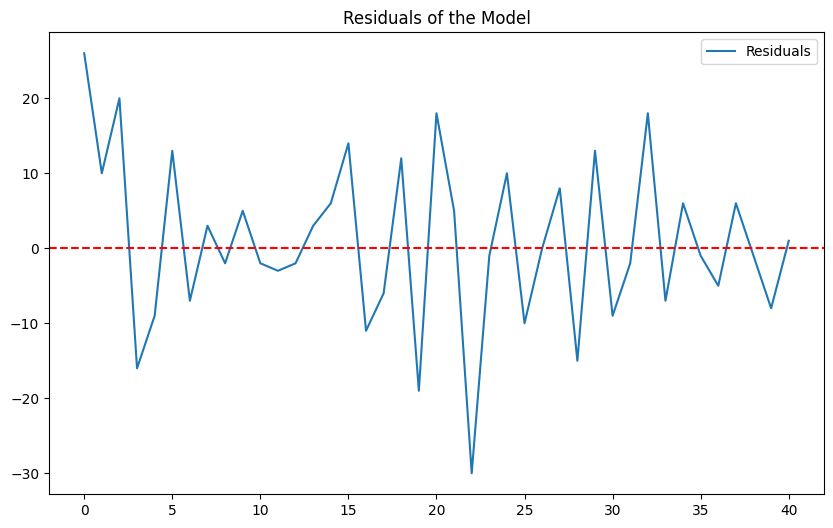

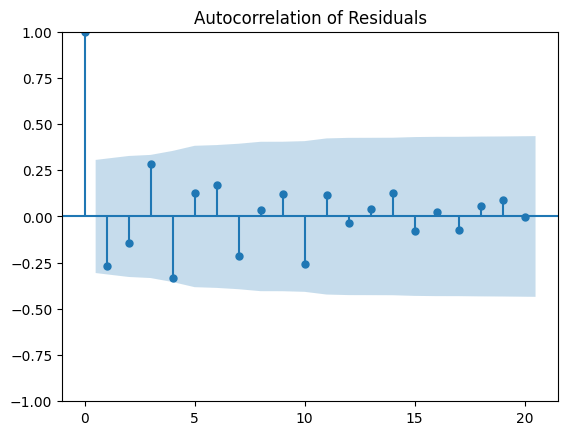


Forecasted Sales for Sleeveless Tops (Next 10 Weeks)
  Week  Quantity
0   53        31
1   54        31
2   55        31
3   56        31
4   57        31
5   58        31
6   59        31
7   60        31
8   61        31
9   62        31


Forecasting for Sarongs


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



	Evaluation Metrics for Sarongs:
		Mean Absolute Error (MAE): 7.82
		Mean Squared Error (MSE): 90.55
		Root Mean Squared Error (RMSE): 9.52
		Mean Absolute Percentage Error (MAPE): 20.71%
		AIC: 10.0



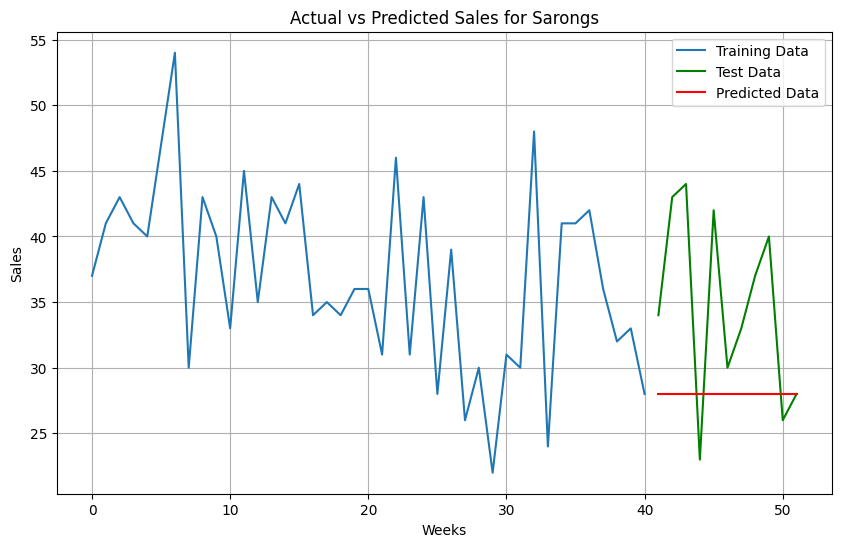

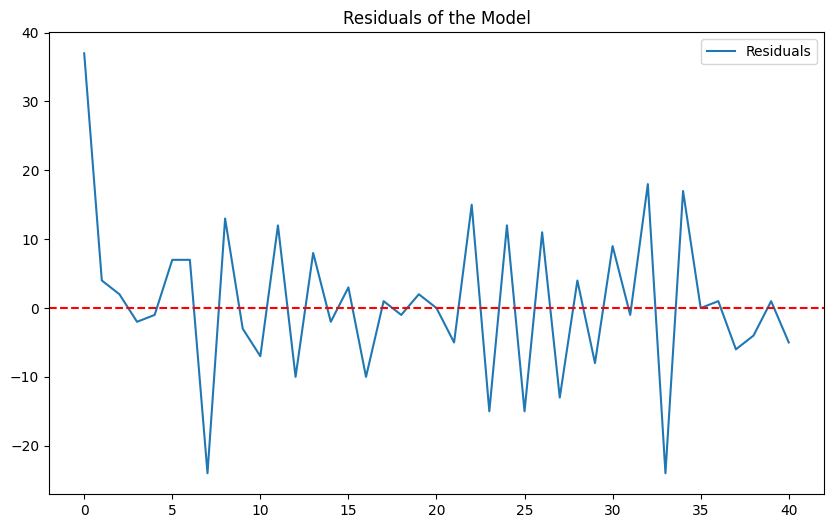

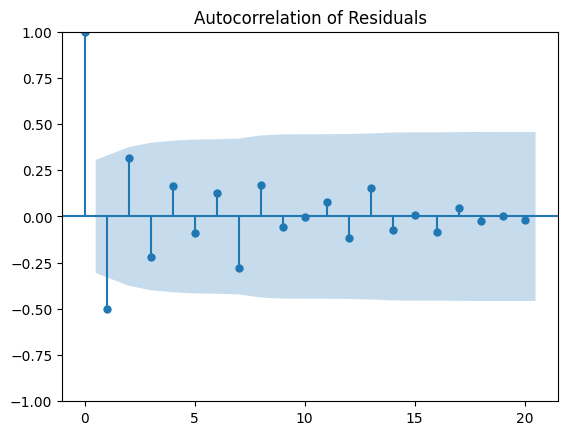


Forecasted Sales for Sarongs (Next 10 Weeks)
  Week  Quantity
0   53        28
1   54        28
2   55        28
3   56        28
4   57        28
5   58        28
6   59        28
7   60        28
8   61        28
9   62        28


In [8]:
for i in range(0, 10):
  product_index = data.Product_Name[i]
  print(f'\n\nForecasting for {product_index}')
  results = evaluate_and_forecast(product_index, steps=10)
  print(f'\nForecasted Sales for {product_index} (Next 10 Weeks)')
  Week = [f'{j + 53}'for j in range(0, 10)]
  print(pd.DataFrame({'Week':Week,'Quantity':results['forecasted_values']}))


Forecasting for BreezeFit T- Shirts...
Evaluation Metrics for BreezeFit T- Shirts:
Mean Absolute Error (MAE): 8.47
Mean Squared Error (MSE): 156.51
Root Mean Squared Error (RMSE): 12.51
Mean Absolute Percentage Error (MAPE): 16.20%


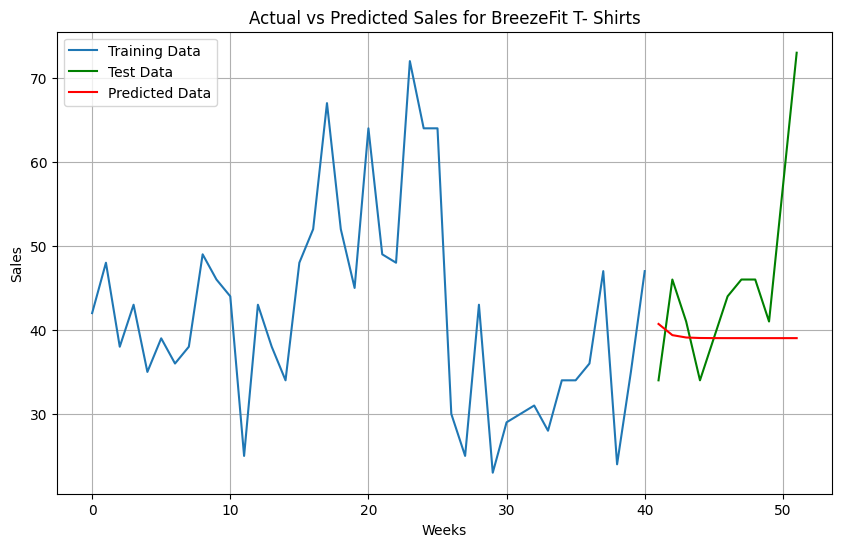

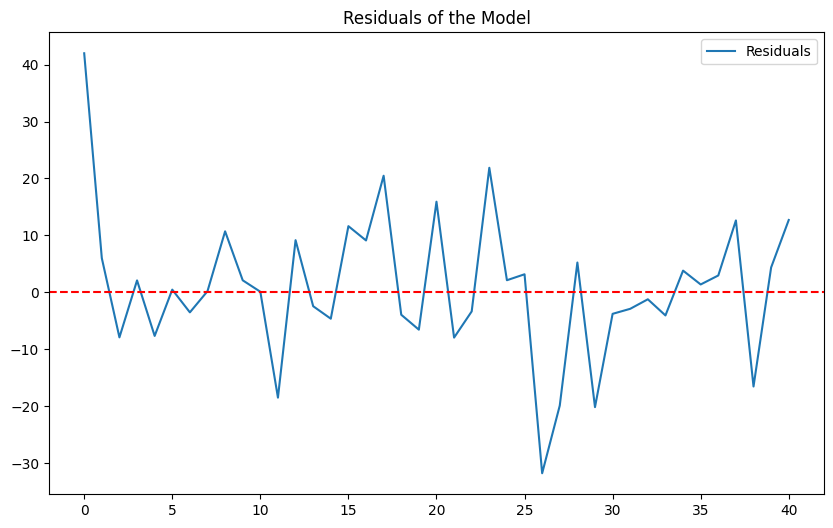

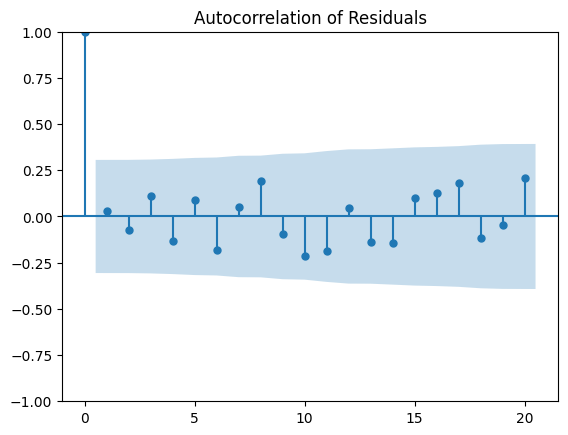

Forecasted Sales for BreezeFit T- Shirts (Next 10 Weeks)
[41 39 39 39 39 39 39 39 39 39]

Forecasting for Linen Shirts...
Evaluation Metrics for Linen Shirts:
Mean Absolute Error (MAE): 6.22
Mean Squared Error (MSE): 56.59
Root Mean Squared Error (RMSE): 7.52
Mean Absolute Percentage Error (MAPE): 17.48%


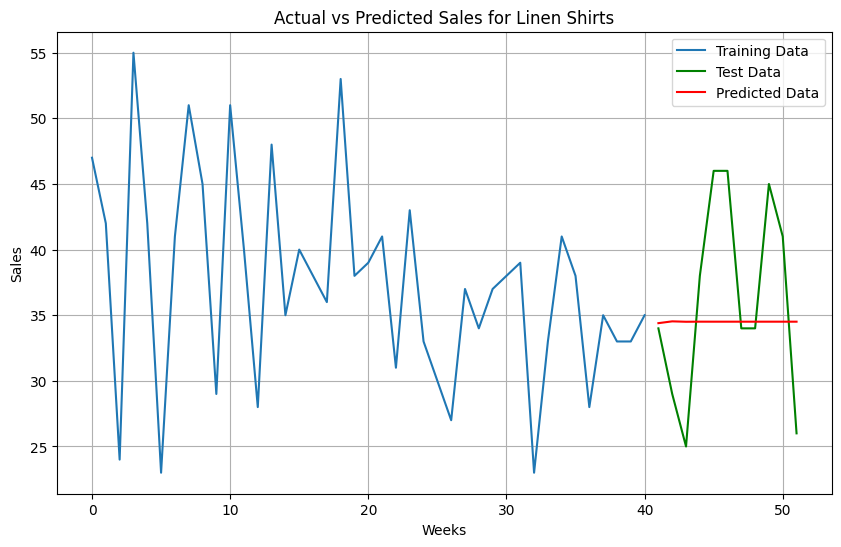

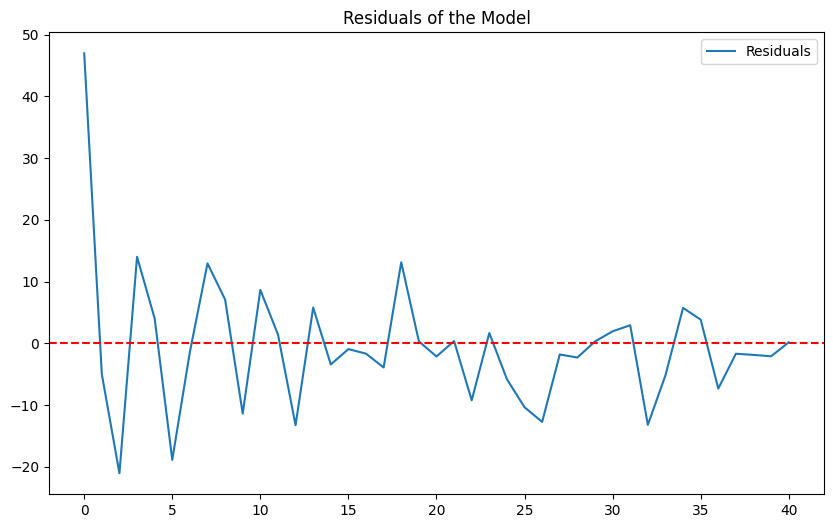

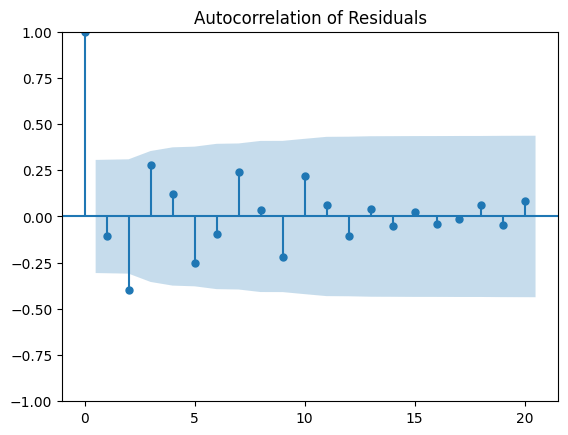

Forecasted Sales for Linen Shirts (Next 10 Weeks)
[34 35 35 35 35 35 35 35 35 35]

Forecasting for CoolWave BoardShorts...
Evaluation Metrics for CoolWave BoardShorts:
Mean Absolute Error (MAE): 7.21
Mean Squared Error (MSE): 84.90
Root Mean Squared Error (RMSE): 9.21
Mean Absolute Percentage Error (MAPE): 18.43%


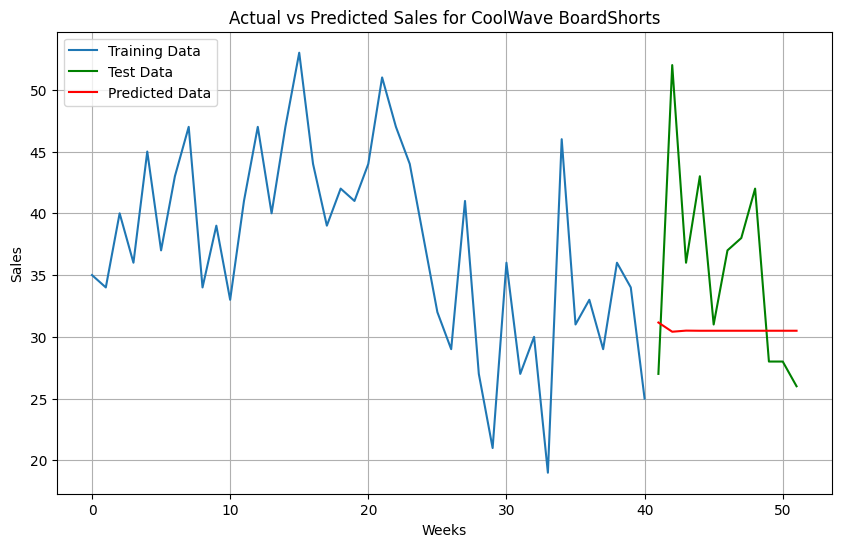

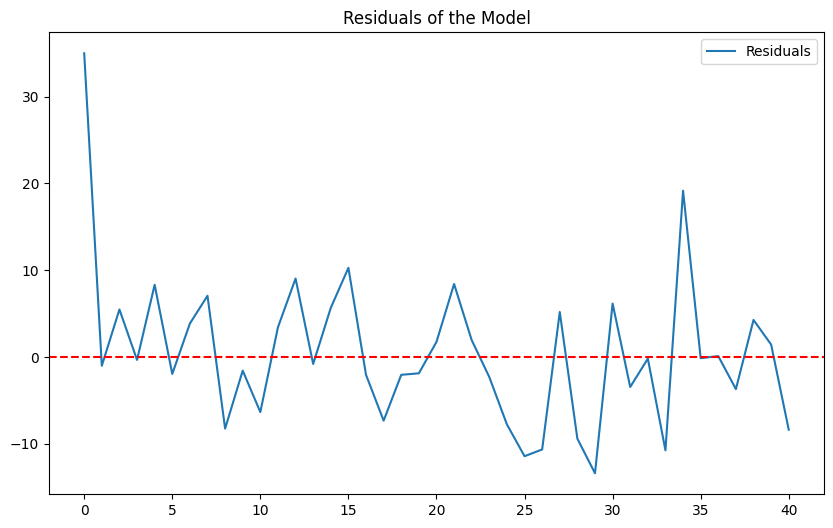

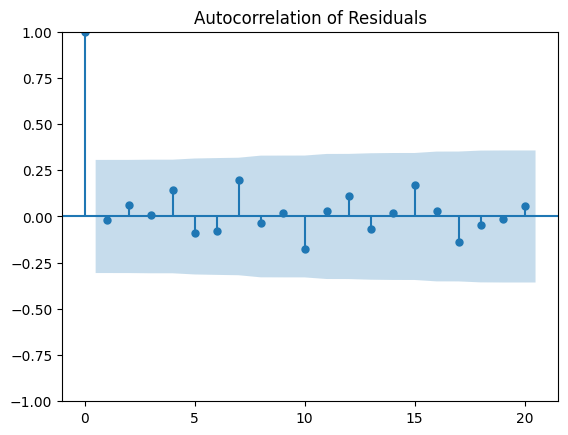

Forecasted Sales for CoolWave BoardShorts (Next 10 Weeks)
[31 30 31 30 30 30 30 30 30 30]

Forecasting for Maxi Dresses...
Evaluation Metrics for Maxi Dresses:
Mean Absolute Error (MAE): 6.61
Mean Squared Error (MSE): 81.63
Root Mean Squared Error (RMSE): 9.03
Mean Absolute Percentage Error (MAPE): 27.79%


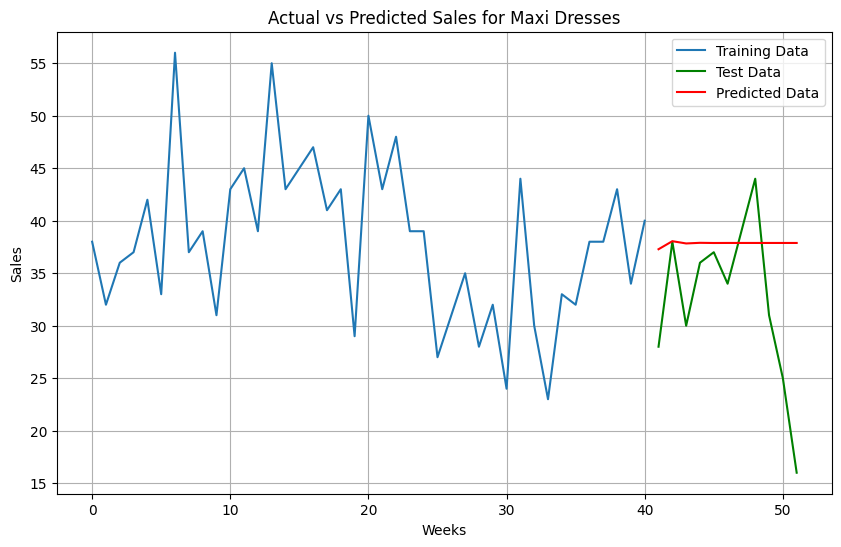

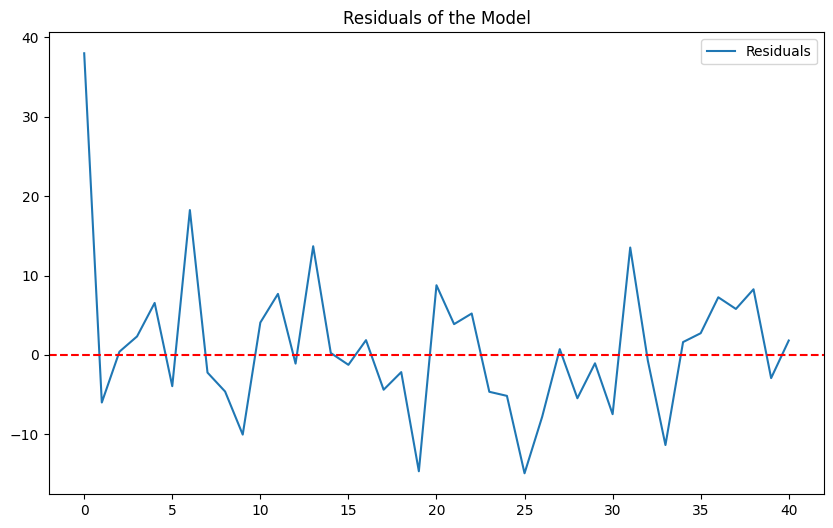

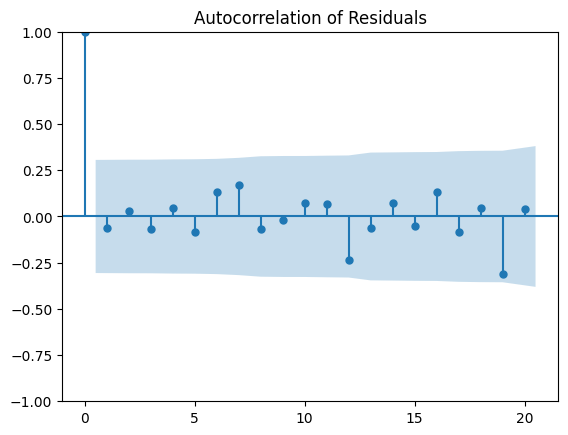

Forecasted Sales for Maxi Dresses (Next 10 Weeks)
[37 38 38 38 38 38 38 38 38 38]

Forecasting for Tank Top...
Evaluation Metrics for Tank Top:
Mean Absolute Error (MAE): 5.77
Mean Squared Error (MSE): 48.06
Root Mean Squared Error (RMSE): 6.93
Mean Absolute Percentage Error (MAPE): 15.11%


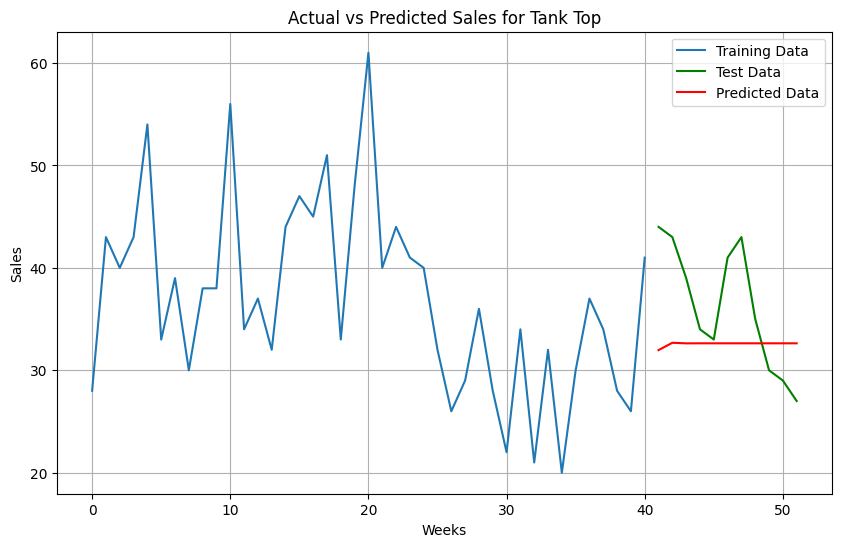

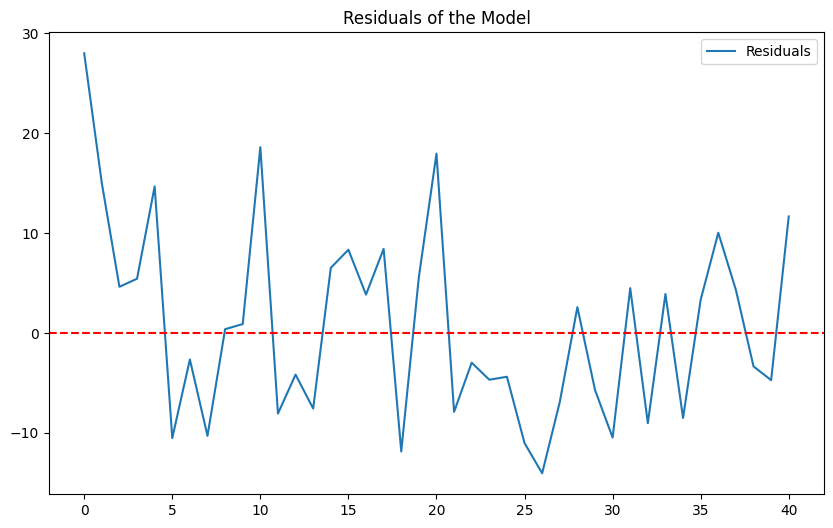

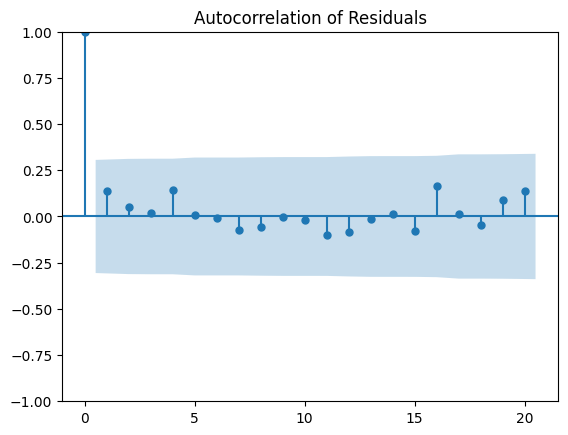

Forecasted Sales for Tank Top (Next 10 Weeks)
[32 33 33 33 33 33 33 33 33 33]

Forecasting for PalmShade Shorts...
Evaluation Metrics for PalmShade Shorts:
Mean Absolute Error (MAE): 5.89
Mean Squared Error (MSE): 38.27
Root Mean Squared Error (RMSE): 6.19
Mean Absolute Percentage Error (MAPE): 18.82%


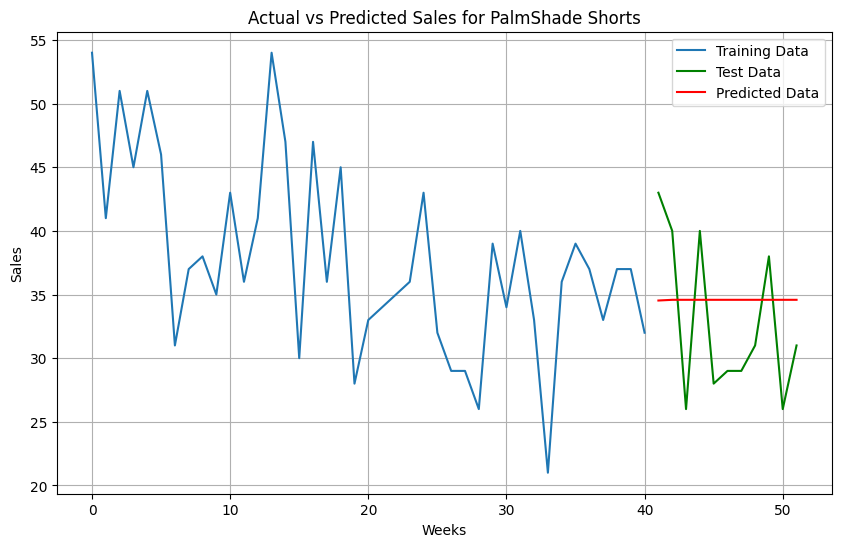

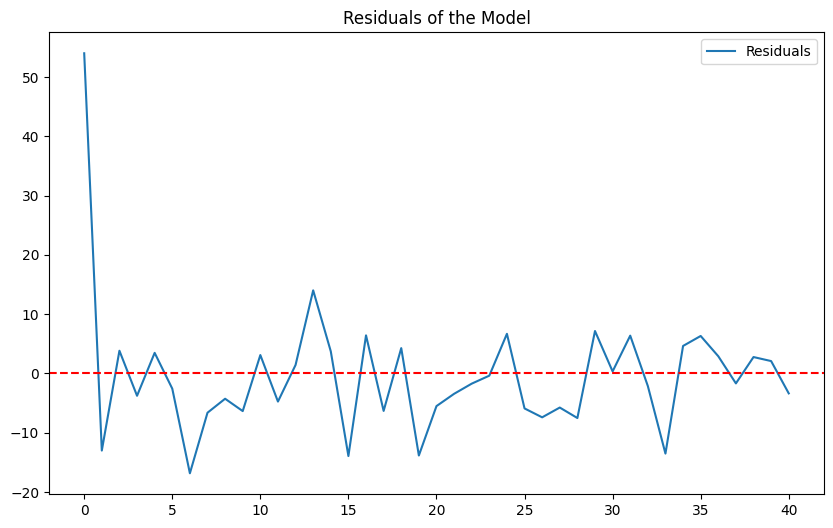

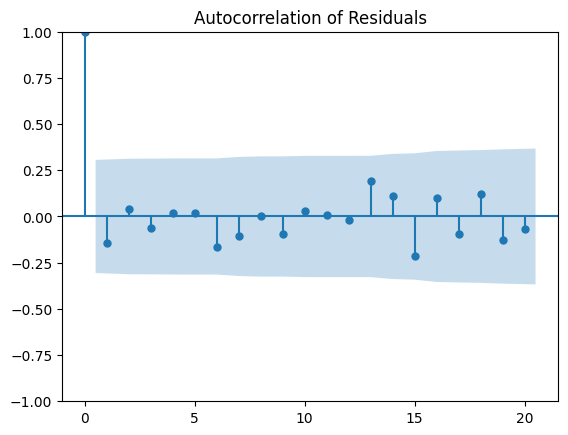

Forecasted Sales for PalmShade Shorts (Next 10 Weeks)
[35 35 35 35 35 35 35 35 35 35]

Forecasting for Beach Towels...
Evaluation Metrics for Beach Towels:
Mean Absolute Error (MAE): 6.57
Mean Squared Error (MSE): 73.78
Root Mean Squared Error (RMSE): 8.59
Mean Absolute Percentage Error (MAPE): 20.87%


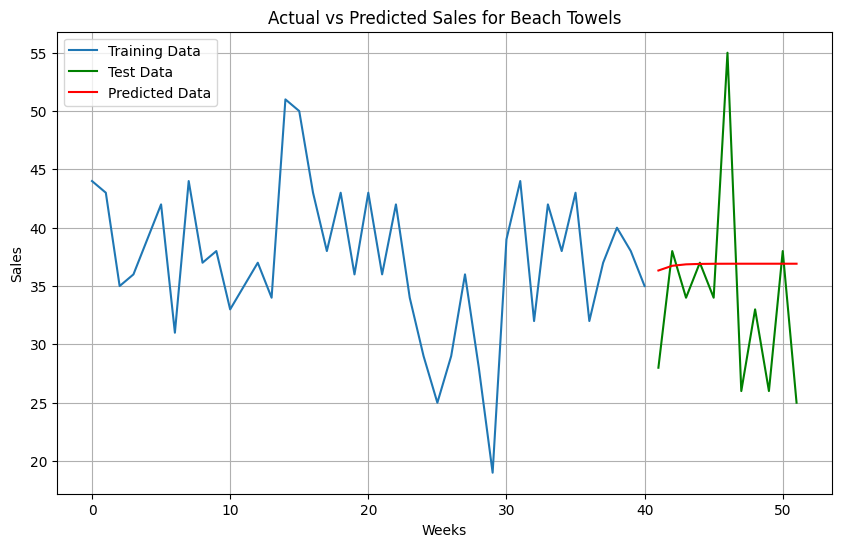

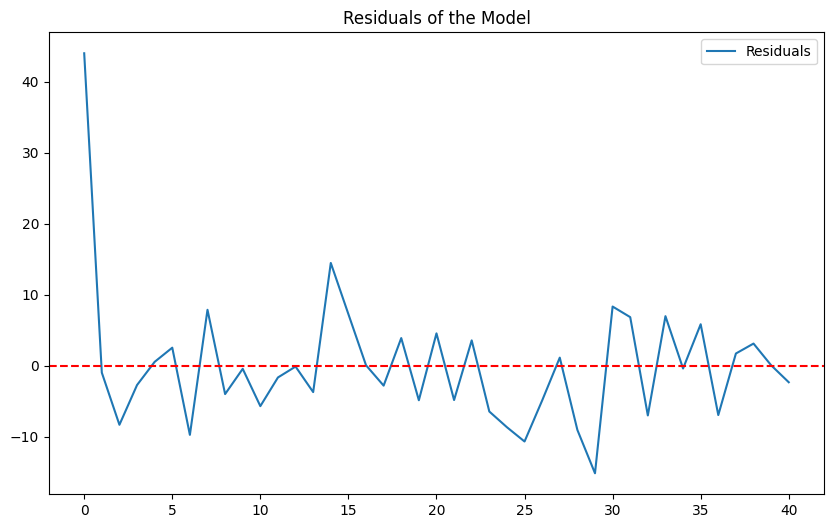

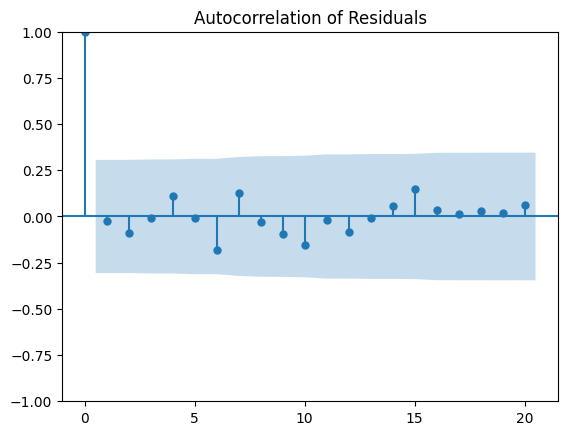

Forecasted Sales for Beach Towels (Next 10 Weeks)
[36 37 37 37 37 37 37 37 37 37]

Forecasting for Wrap Skirts...
Evaluation Metrics for Wrap Skirts:
Mean Absolute Error (MAE): 6.29
Mean Squared Error (MSE): 82.65
Root Mean Squared Error (RMSE): 9.09
Mean Absolute Percentage Error (MAPE): 25.34%


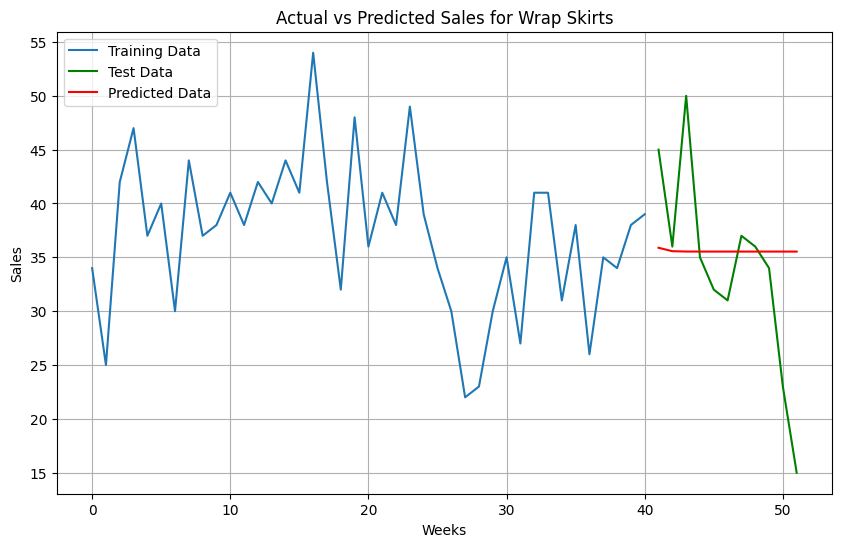

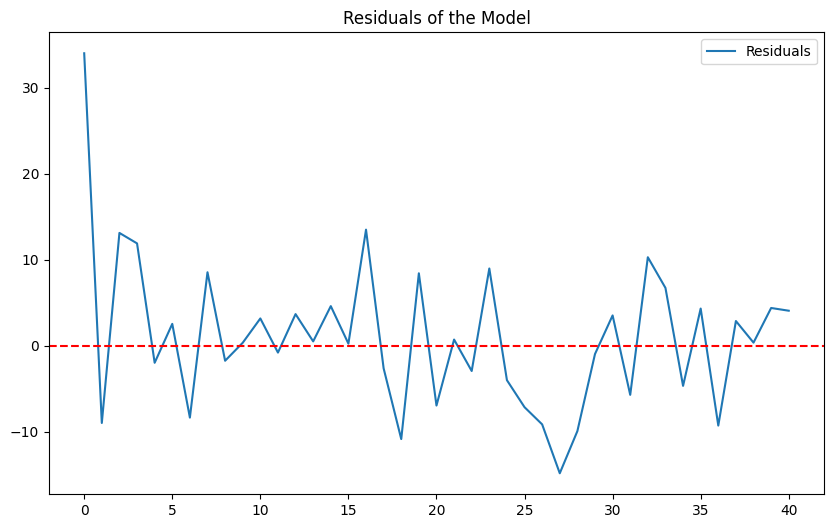

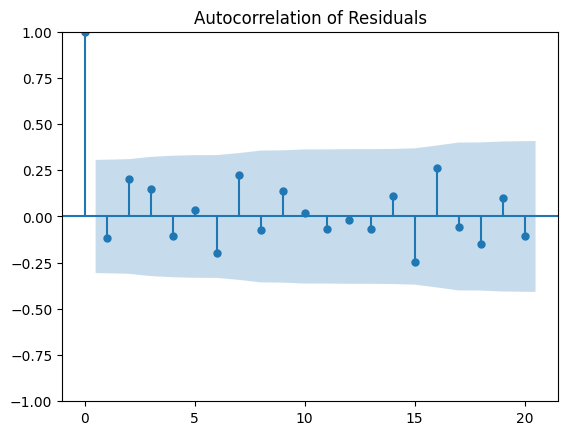

Forecasted Sales for Wrap Skirts (Next 10 Weeks)
[36 36 36 36 36 36 36 36 36 36]

Forecasting for Sleeveless Tops...
Evaluation Metrics for Sleeveless Tops:
Mean Absolute Error (MAE): 5.24
Mean Squared Error (MSE): 42.75
Root Mean Squared Error (RMSE): 6.54
Mean Absolute Percentage Error (MAPE): 18.60%


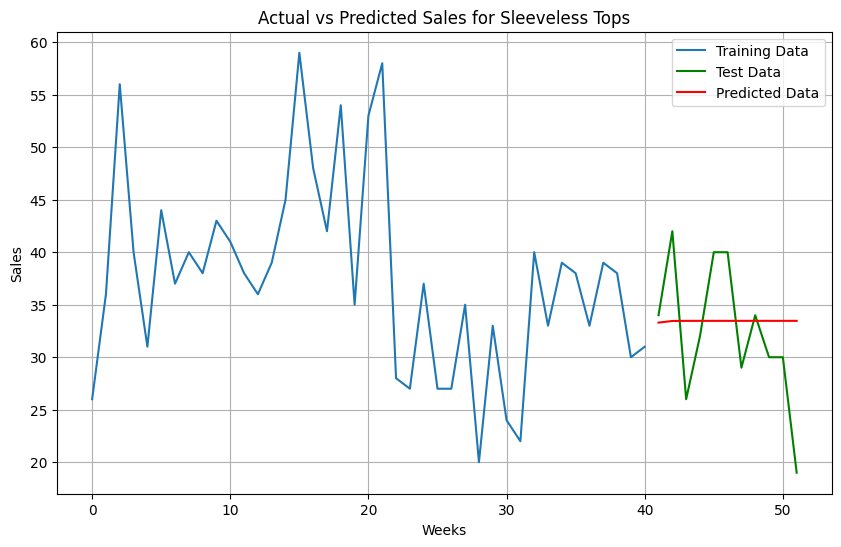

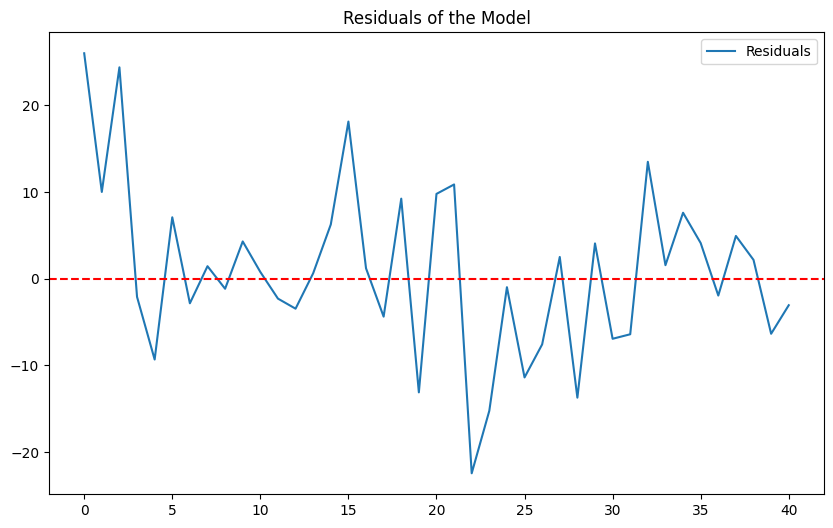

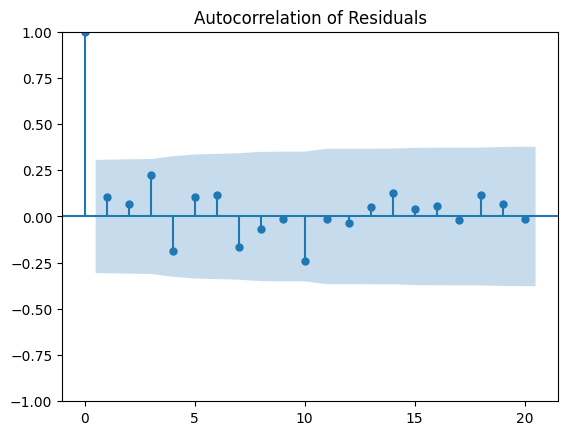

Forecasted Sales for Sleeveless Tops (Next 10 Weeks)
[33 33 33 33 33 33 33 33 33 33]

Forecasting for Sarongs...
Evaluation Metrics for Sarongs:
Mean Absolute Error (MAE): 6.29
Mean Squared Error (MSE): 55.65
Root Mean Squared Error (RMSE): 7.46
Mean Absolute Percentage Error (MAPE): 17.96%


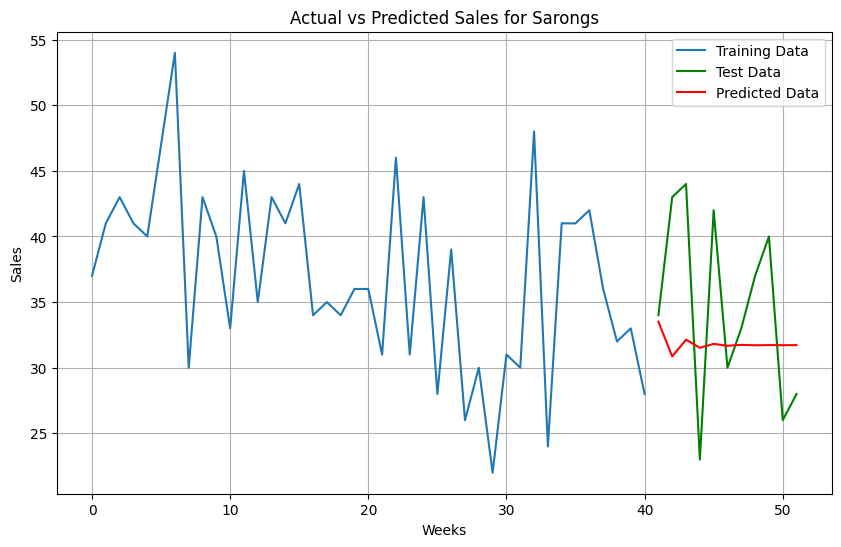

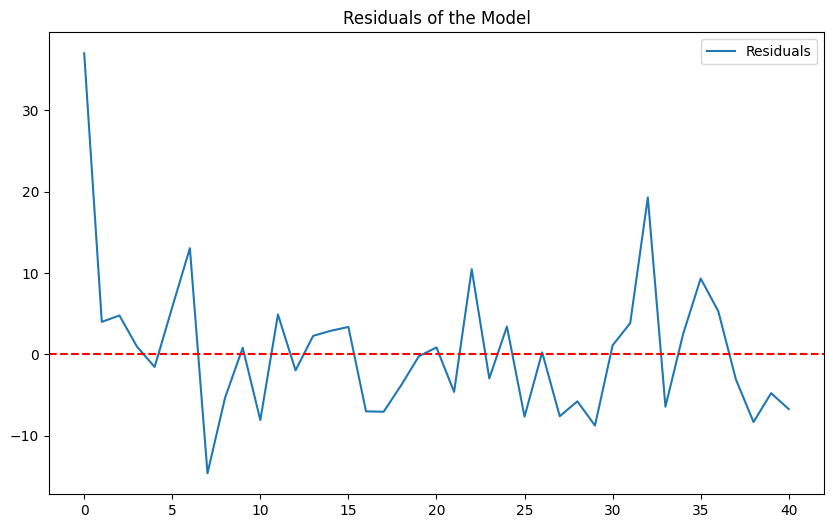

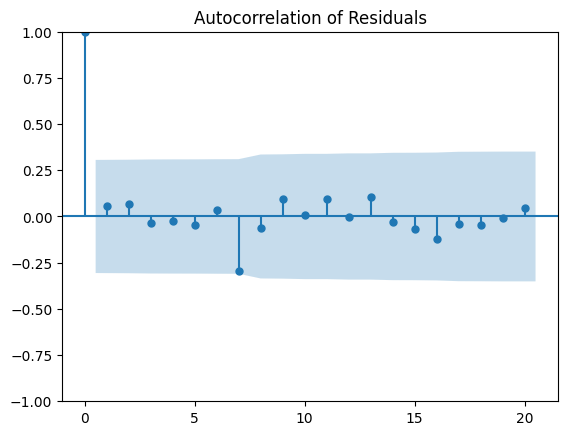

Forecasted Sales for Sarongs (Next 10 Weeks)
[34 31 32 32 32 32 32 32 32 32]


In [ ]:
def evaluate_all_products(steps=10):
     for product_name in data['Product_Name'].unique():
        print(f"\nForecasting for {product_name}...")
        ##evaluate_and_forecast(product_name, steps=steps)
        results = evaluate_and_forecast(product_name, steps=10)
        print(f'Forecasted Sales for {product_name} (Next 10 Weeks)')
        print(results['forecasted_values'])
evaluate_all_products(steps=10)